In [1]:
%display latex

In [2]:
%display latex
var('t')
y=function('y')(t)
omega=2*pi;Q=1;f=1;
qu=diff(y,t,2)\
+omega*diff(y,t)/Q\
+omega^2*y==omega^2*cos(2*pi*f*t);qu

4*pi^2*y(t) + 2*pi*diff(y(t), t) + diff(y(t), t, t) == 4*pi^2*cos(2*pi*t)

In [3]:
diff(y,t,2)+omega*diff(y,t)

2*pi*diff(y(t), t) + diff(y(t), t, t)

In [4]:
omega*diff(y,t)

2*pi*diff(y(t), t)

In [5]:
Q+omega^2*y

4*pi^2*y(t) + 1

In [6]:
%display latex
var('t k b ') 
x = function('x')(t) 
DE2 = diff(x,t,t) == -2*x - 1/2*diff(x,t) 
u2 = desolve(DE2, x, ivar=t)

In [7]:
var('R,R_w,I,U,U_t') 
U_t = U==I*(R+R_w)
show(U_t)

U == I*(R + R_w)

In [8]:
eq=solve(U_t,I);eq

[I == U/(R + R_w)]

In [9]:
P=R*I^2;P

I^2*R

In [10]:
P1=P.substitute(eq[0]);P1

R*U^2/(R + R_w)^2

In [11]:
P1.diff(R)==0 

U^2/(R + R_w)^2 - 2*R*U^2/(R + R_w)^3 == 0

In [12]:
solve(_, R) 

[R == R_w]

In [13]:
P1.diff(R, 2) 

-4*U^2/(R + R_w)^3 + 6*R*U^2/(R + R_w)^4

In [14]:
_.substitute(R==R_w)

-1/8*U^2/R_w^3

In [15]:
solve(_<0, R_w) 

[[0 < R_w, U != 0]]

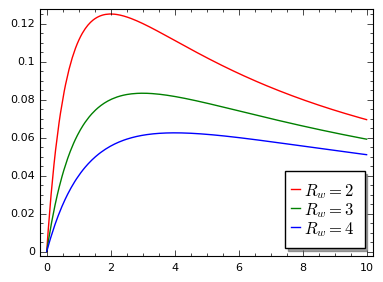

In [16]:
P2 = plot(P1.subs({U:1, R_w:2}),(R,0,10), color="red",legend_label=r'$R_w=2$')
P3 = plot(P1.subs({U:1, R_w:3}),(R,0,10), color="green", legend_label=r'$R_w=3$')
P4 = plot(P1.subs({U:1, R_w:4}),(R,0,10), color="blue", legend_label=r'$R_w=4$')
show(P2+P3+P4,figsize=4,frame=True,fontsize=8,axes=False)

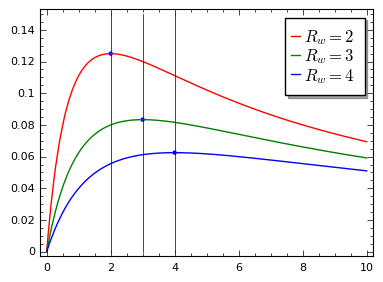

In [17]:
P2l = P2 +line([(2,0),(2,0.15)], color="black", thickness=0.5) +point((2, P1.subs({U:1, R_w:2, R:2}))) 
P3l = P3 +line([(3,0),(3,0.15)], color="black", thickness=0.5) +point((3, P1.subs({U:1, R_w:3, R:3}))) 
P4l = P4 +line([(4,0),(4,0.15)], color="black", thickness=0.5) +point((4, P1.subs({U:1, R_w:4, R:4}))) 
show(P2l+P3l+P4l,figsize=4,frame=True,fontsize=8,axes=False)

In [18]:
p3d = plot3d(P1.substitute({U:1}), (R,0.01,1), (R_w,0.1,1)) 
f(R)=P1.substitute({U:1,R_w:R}); show(f) 

R |--> 1/4/R

In [19]:
l=line3d( [ (R1,R1,f(R1)) for R1 in srange(.1,1,0.01)],thickness=10,color='red' ) 
l2=line3d( [ (R1,R1,0) for R1 in srange(.1,1,0.1)],thickness=2,color='gray' ) 
(p3d+l+l2).show(viewer='threejs')

Graphics3d Object

In [20]:
var('C, R_o,R, t, U_0, U_in, omega') 
U = function('U')(t) 
R_0= U.diff()+U/(R*C)==0;show(R_0)

U(t)/(C*R) + diff(U(t), t) == 0

In [21]:
sol = desolve(R_0, U, ivar=t, ics=[0, U_0]);sol

U_0*e^(-t/(C*R))

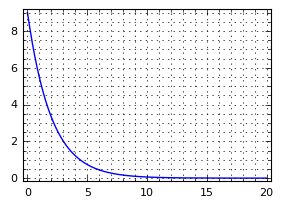

In [22]:
show(plot(sol.substitute({U_0:9, R:1, C:2}), 0, 20),
     figsize=3,frame=True,axes=False,gridlines="minor",
    fontsize=8) 

In [23]:
R_0= U.diff() + U/(R*C) == U_in/(R*C)
sol = desolve(R_0, U, ivar=t, ics=[0,U_0]);R_0,sol

(U(t)/(C*R) + diff(U(t), t) == U_in/(C*R),
 (U_in*e^(t/(C*R)) + U_0 - U_in)*e^(-t/(C*R)))

In [24]:
assume(C>0); assume(R>0)
limit(sol, t=oo) 

U_in

In [25]:
ex(t) = sol.substitute({C:6, R:1, U_in:9, U_0:0}) 
#show(ex)(t=5, U_in=9, U_0=0, R=1)

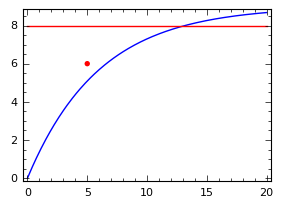

In [26]:
show(plot(ex,(0, 20))\
+ line([(0, 8), (20, 8)],color='red')\
+ point((5,6),color='red', size=15),
     figsize=3,frame=True,fontsize=8,axes=False)

In [27]:
solve(sol.substitute(t=5, U_in=8, U_0=0, R=1)==6, C) 

[C == (1/log(1/4*4^(1/5)*(sqrt(5) + I*sqrt(2*sqrt(5) + 10) - 1))), C == (1/log(-1/4*4^(1/5)*(sqrt(5) - I*sqrt(-2*sqrt(5) + 10) + 1))), C == 5/(-4*I*pi + 2*log(2)), C == 5/(-2*I*pi + 2*log(2)), C == 5/2/log(2)]

In [28]:
ex(t) = sol.substitute({C:5/log(3), R:1, U_in:8, U_0:0}) 
show(ex) 

t |--> 8*(e^(1/5*t*log(3)) - 1)*e^(-1/5*t*log(3))

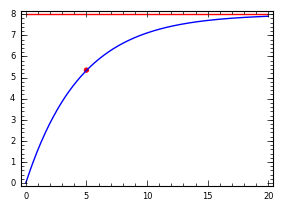

In [29]:
show(plot(ex, (0, 20)) \
+ line([(0, 8), (20, 8)], 
       color='red')\
+ point((5,5.35),color='red', size=15),
figsize=3,frame=True,fontsize=6,axes=False)

In [30]:
R_0= U.diff() + U/(R*C) == U_in*sin(omega*t)/(R*C)
sol = desolve(R_0, U, ivar=t, ics=[0,U_0]);R_0

U(t)/(C*R) + diff(U(t), t) == U_in*sin(omega*t)/(C*R)

In [31]:
sol

(C^2*R^2*U_0*omega^2 - C*R*U_in*omega*cos(omega*t)*e^(t/(C*R)) + C*R*U_in*omega + U_in*e^(t/(C*R))*sin(omega*t) + U_0)*e^(-t/(C*R))/(C^2*R^2*omega^2 + 1)

In [32]:
w0=SR.wild(0); w1=SR.wild(1); w2=SR.wild(2) 
law = w0*sin(w2)+w1*cos(w2)==sqrt(w0^2+w1^2)*sin(w2+sign(w1)*arccos(w1/sqrt(w0^2+w1^2)))
show(law) 

$1*cos($2) + $0*sin($2) == sqrt($1^2 + $0^2)*sin($2 + arccos($1/sqrt($1^2 + $0^2))*sgn($1))

In [33]:
sol2=sol.substitute(law);show(sol2) 

(C^2*R^2*U_0*omega^2 - C*R*U_in*omega*cos(omega*t)*e^(t/(C*R)) + C*R*U_in*omega + U_in*e^(t/(C*R))*sin(omega*t) + U_0)*e^(-t/(C*R))/(C^2*R^2*omega^2 + 1)

In [34]:
ex(t) = sol.substitute({C:1, R:6, U_in:9, omega:6, U_0:0}) 
show(ex) 

t |--> -9/1297*(36*cos(6*t)*e^(1/6*t) - e^(1/6*t)*sin(6*t) - 36)*e^(-1/6*t)

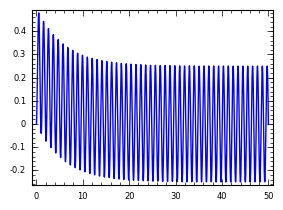

In [35]:
show(plot(ex,0,50,figsize=3,frame=True,fontsize=6,axes=False))

In [36]:
amp = sol2.substitute(w0*sin(w1)+w2==abs(w0)).full_simplify() 
show(amp) 

abs(U_in)/(C^2*R^2*omega^2 + 1)

In [37]:
var('A');assume(A>0); assume(U_in>0) 
solve(amp==A, omega) 

[omega == -sqrt(U_in/A - 1)/(C*R), omega == sqrt(U_in/A - 1)/(C*R)]

In [38]:
R_A = omega.substitute(_[1]);R_A

sqrt(U_in/A - 1)/(C*R)

In [39]:
solA = sol.substitute({omega:R_A}).full_simplify();solA

-(A*sqrt(-(A - U_in)/A)*cos(t*sqrt(-(A - U_in)/A)/(C*R))*e^(t/(C*R)) - A*e^(t/(C*R))*sin(t*sqrt(-(A - U_in)/A)/(C*R)) - A*sqrt(-(A - U_in)/A) - U_0)*e^(-t/(C*R))

In [40]:
example(t) = solA.subs({C:1, R:6, U_in:9, U_0:0, A:1/2}).full_simplify() 
show(example) 

t |--> -1/2*(sqrt(17)*cos(1/6*sqrt(17)*t)*e^(1/6*t) - e^(1/6*t)*sin(1/6*sqrt(17)*t) - sqrt(17))*e^(-1/6*t)

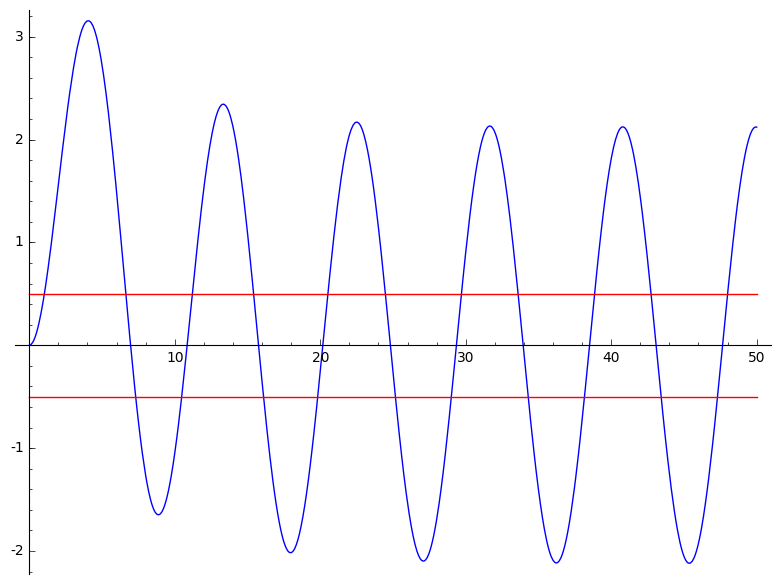

In [41]:
plot(example, 0, 50)\
+line([(0, 0.5), (50, 0.5)], color='red')\
+line([(0, -0.5), (50, -0.5)], color='red') 

In [42]:
rozw=R_A
show(rozw.substitute({U_in:9, A:1/2})) 

sqrt(17)/(C*R)

$i_R=\frac{U_R}{R}$    (1)

$V_L=L\frac{di_L}{dt}$ (2)

$i_C=C\frac{dV_C}{dt}$ (3)

<img src="RC.png">

$i_R$ + $i_C$ = 0

$\frac{V_C-V_in}{R}$ + $C\frac{dV_C}{dt} = 0 $ 

$\frac{v-V_in}{R}$ + $C\frac{dv}{dt} = 0 $ 

In [43]:
var('R, C, L, V_in');t = var('t') ;v = function('v')(t)

In [44]:
eq1 = (v-V_in)/R + C* diff(v,t) == 0 
print 'équation circuit RC:' 
show(eq1) 

équation circuit RC:


C*diff(v(t), t) - (V_in - v(t))/R == 0

In [45]:
sol1(t)=desolve(eq1.lhs(), v, ivar=t) 
eq2 = v == sol1 
print ' Solution :' 
show(eq2(t)) 

 Solution :


v(t) == (V_in*e^(t/(C*R)) + _C)*e^(-t/(C*R))

In [46]:
sol2(t,R,C,V_in) = desolve(eq1.lhs(), v, ivar=t, ics=[0,0]) 
eq3 = v == sol2 
print 'Equations avec conditions initiales :' 
show(eq3(t)) 

Equations avec conditions initiales :


v(t) == (V_in*e^(t/(C*R)) - V_in)*e^(-t/(C*R))